<font face="B Mitra" size=4>
<div dir=rtl>
<p>
کتابخانه‌های مورد نیاز را import می‌کنیم.
</div>
</font>

In [ ]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
با استفاده از torchvision.datasets دیتاست MNIST که شامل ارقام دست نویس است را دانلود می‌کنیم و آن را به ترین و تست تقسیم می‌کنیم و آن ها را به تنسور تبدیل می‌کنیم
برای آموزش شبکه از DataLoader استفاده می‌کنیم که داده‌ها را در هر مرحله از یادگیری فراهم می‌کند و قابلیت iterate بر روی دیتاست و بچ کردن آن را فراهم می‌کند.
اندازه بچ را ۳۲ در نظر می‌گیریم.
</div>
</font>

In [ ]:
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16800514.03it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 453416.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3650716.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2875985.62it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



<font face="B Mitra" size=4>
<div dir=rtl>
<p>
در فرآیند encode-decode  در ابتدا دیتا را در قالب بعد کمتری فشرده سازی می‌کنیم و سپس با استفاده از این بعد کوچکتر دیتای اصلی را دوباره می‌سازیم
لایه‌های پیچشی بااعمال تعدادی فیلتر بر روی داده ورودی سعی در پیدا کردن فیچرهای مختلف دیتا دارند
کلاس Encoderو Decoder از nn.Module ارث بری می‌کند که کلاس پایه برای شبکه‌های عصبی است. متد __init__ که در هنگام ساخت شی صدا زده می‌شود شامل conv1, conv2, conv3 است که در ادامه توضیح داده می‌شود . relu که همان  تابع RelU  است
متد forward مشخص می‌کند که داده‌های ورودی چگونه در شبکه حرکت کنند و به لایه آخر برسند.

پارامترهای ورودی Conv2d عبارت است از:
تعداد کانال ورودی که در تصاویر خاکستری ۱ است

تعداد کانال خروجی که توسط عملگر پیچشی تولید می‌شود و تعداد بیشتر آن باعث می‌شود که لایه پیچشی اطلاعات بیشتری را درباره فیچرهای داده ورودی بیاموزد

سایز فیلتر که مقادیر آن توسط شبکه یاد گرفته میشود.

stride: که مشخص می‌کند سایز گام برای حرکت دادن فیلتر چقدر است

padding: که تعداد پیکسل‌هایی که به تصویر ورودی اضافه می‌شود را نشان می دهد.

در هر بچ ۳۲ تصویر با ابعاد۲۸* ۲۸ * ۱
پس ورودی با ابعاد ۳۲،۱،۲۸،۲۸ است و با در نظر گرفتن out_channels = 16, kernel_size = 3, stride = 2, padding = 1 خروجی برابر است با 32,16,14,14
می‌دانیم خروجی لایه اول ورودی لایه دوم است و به همین ترتیب خروجی لایه دوم برابر است با:
32,32,7,7
وخروجی لایه آخر برابر است با ۳۲،۶۴،۱،۱  که همان ابعاد مورد نظر است.

متد forward هم بر روی ورودی داده شده conv2d هر لایه را اعمال می کند و سپس تابع فعالساز Relu را اعمال می‌کند و در نهایت x را برمی‌گرداند.

پیاده سازی کلاس Decoder
کلاس Decoder تقریبا شبیه کلاس Encoder  است با این تفاوت که به جای conv2d از conTranspose2d استفاده می‌کنیم که معادل ترانهاده convolution  است و عمل برعکس Conv2d را انجام می‌دهد
شبیه Conv2d شامل پارامترهای زیر است:

تعداد کانال‌های ورودی ،
تعداد کانال‌های خروجی،
سایز فیلتر،stride ،padding و output_padding که سایز اضافه شده به خروجی است.
 به همین ترتیب برای ورودی 32,64,1,1 که ابعاد ورودی decoder است خروجی با ابعاد 32,32,7,7 را داریم و به همین ترتیب برای لایه دوم خروجی 32,16,14,14 را داریم و برای لایه آخر خروجی  32,1,28,28 را داریم.

متد forward هم شبیه متد forward کلاس Encoder است.
</div>
</font>

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # 32, 1, 28, 28
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        # 32, 16, 14, 14
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        #32, 32, 7, 7
        self.conv3 = nn.Conv2d(32, 64, kernel_size=7)
        #32, 64, 1, 1
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        return x

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        #32, 64, 1, 1
        self.convT1 = nn.ConvTranspose2d(64, 32, kernel_size=7)
        #32, 32, 7, 7
        self.convT2 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1)
        #32, 16, 14, 14
        self.convT3 = nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1)
        #32, 1, 28, 28
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.convT1(x))
        x = self.relu(self.convT2(x))
        x = self.relu(self.convT3(x))
        return x

In [ ]:
nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1)(torch.randn(32,16,14,14)).shape


torch.Size([32, 1, 28, 28])

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
در هر epoch از فرایند یادگیری، یک نمودار (subplot) 2 * 10 از 10 داده آخر هر batch و عکس های تولید شده متناظر آنها توسط شبکه را رسم می‌کنیم.
</div>
</font>

In [ ]:
def show_images(original, reconstructed):
    fig, ax = plt.subplots(2, 10, figsize=(15, 3))

    for i in range(10):
        ax[0, i].imshow(original[i].squeeze(), cmap='gray')
        ax[0, i].axis('off')
        ax[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
        ax[1, i].axis('off')

    plt.show()

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
در فرایند یادگیری ابتدا یک شیء از Encoder و Decoder ساخته و با ورودی دادن آنها به n..Sequential یک مدل می‌سازیم.
هدفمان بازیابی تصاویر از طریق ساختار encoder-decoder است، پس باید تابع خطا بصورت MSE بین پیکسل های تصویر اصلی و تصویر تولید شده توسط شبکه تعریف کنیم. در فرایند یادگیری از اپتیمایزر Adam با نرخ یادگیری 0.001 استفاده می‌کنیم. طبق نتایج نشان داده شده این optimizer معمولا از بقیه عملکرد بهتری دارد وما هم از آن استفاده می‌کنیم.
قبل از ترین کردن مدل، ابتدا خروجی شبکه برای 10 تصویر از یک batch در DataLoader را نمایش می‌دهیم.
سپس به ازای هر epoch بین 1 تا 10، و به ازای هر batch در DataLoader، خروجی  شبکه ، loss و گرادیان ها محاسبه و بروز رسانی می‌شوند.
پس از آموزش مدل، عملکرد آن را برروی داده های تست ارزیابی می‌کنیم. به این صورت که به ازای هر batch در test_loader خطای آن را (مقدار loss) را محاسبه کرده و میانگین این خطاها را محاسبه می‌کنیم. در نهایت 10 عکس از test_loader انتخاب می‌کنیم آنها را به همراه تصویر متناظر تولید شده شان توسط شبکه رسم می‌کنیم.

هم چنین یک معیار early_stop را برابر 0.0060 قرار می‌دهیم تا درصورتی که مقدار loss کمتر از 0.6 شد فرایند train متوقف شود.
</div>
</font>

Loss:  0.0945


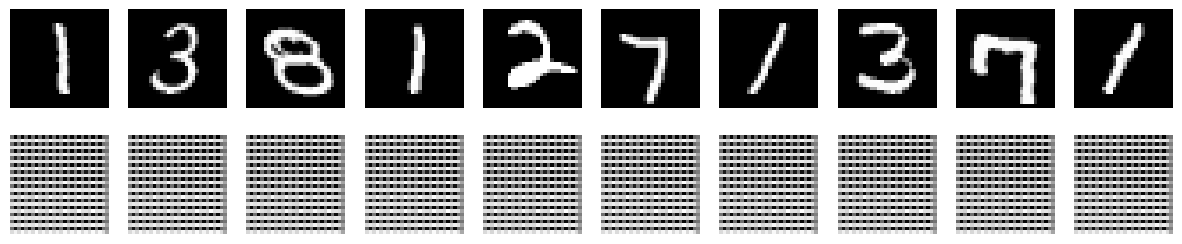

Epoch [1/20], Loss: 0.0085


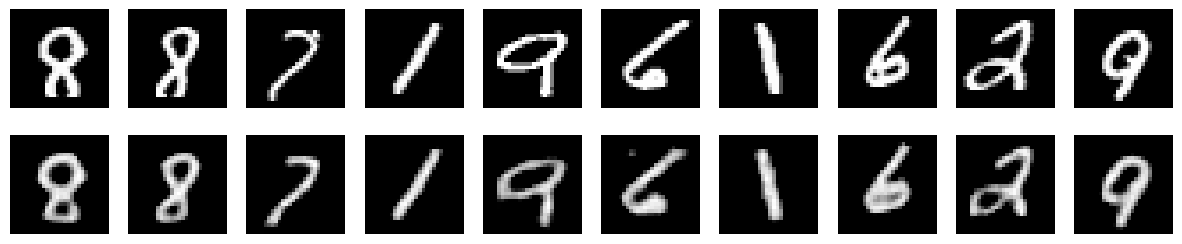

Epoch [2/20], Loss: 0.0073


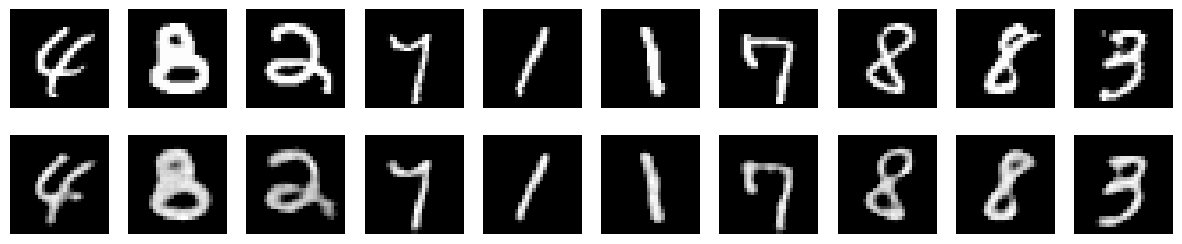

Epoch [3/20], Loss: 0.0058


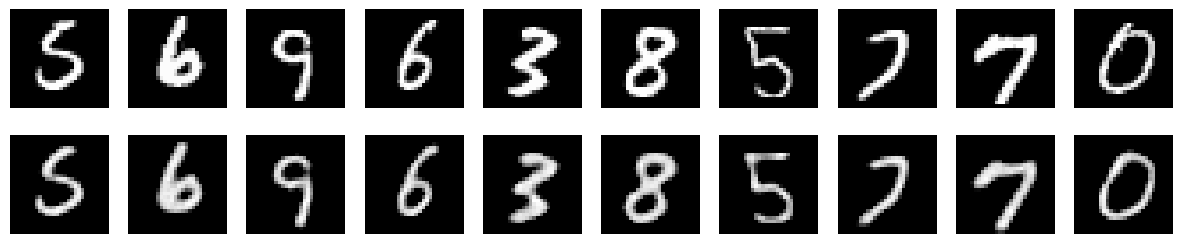

Epoch [4/20], Loss: 0.0065


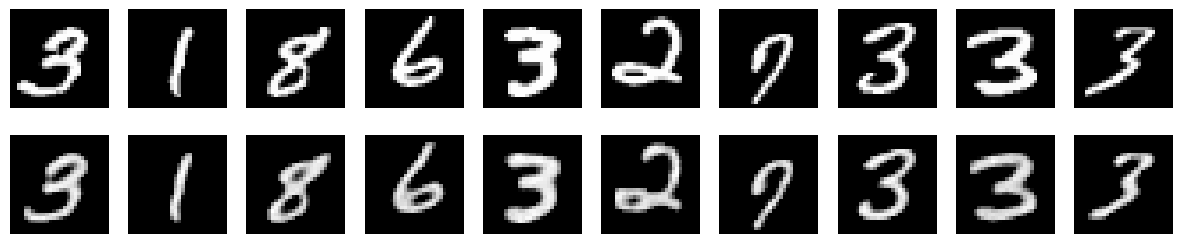

Epoch [5/20], Loss: 0.0059


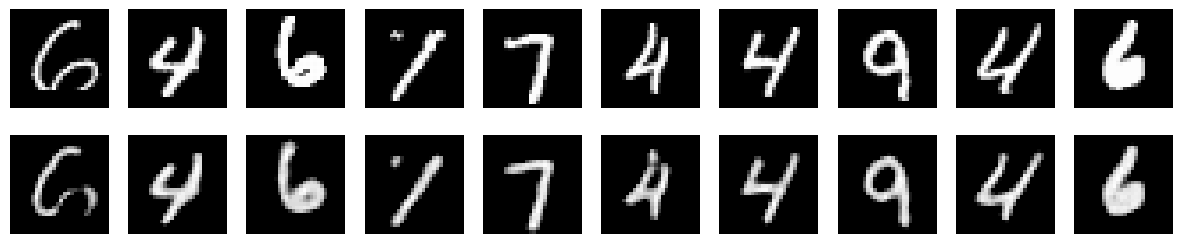

Early stopping at Epoch [6/20], Loss:  0.003837


In [ ]:
encoder = Encoder()
decoder = Decoder()
model = nn.Sequential(encoder, decoder)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20
early_stop = 0.0040

images, _ = next(iter(train_loader))
out = model(images)
loss = criterion(out, images)
print(f'Loss: {loss.item(): .4f}')
show_images(images[:10], out.detach().cpu()[: 10])

for epoch in range(num_epochs):
    for images, _ in train_loader:
        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if loss.item() < early_stop:
          print(f'Early stopping at Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item(): .6f}')
          break

    else:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        show_images(images[: 10], outputs.detach().cpu()[: 10])
        continue
    break

Average Loss on Testset:  0.0054
Maxmium Loss on Testset  0.0071, Batch [313]


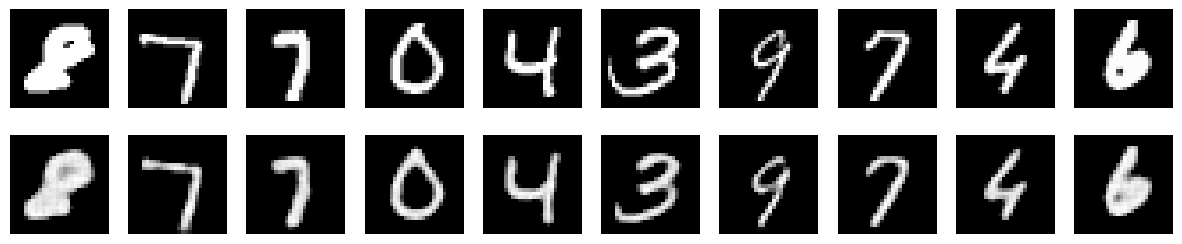

In [ ]:
test_losses = []
for i, (images, _) in enumerate(test_loader):
    outputs = model(images)
    loss = criterion(outputs, images)
    test_losses.append(loss.item())

# Evaluation ...
avg_test_loss = sum(test_losses) / len(test_losses)
max_test_loss = max(test_losses)
print(f'Average Loss on Testset: {avg_test_loss: .4f}')
print(f'Maxmium Loss on Testset {max_test_loss: .4f}, Batch [{i + 1}]')

images, _ = next(iter(test_loader))
outputs = model(images)
show_images(images[: 10], outputs.detach().cpu()[: 10])

In [ ]:
!curl https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet --output yellow_tripdata_2023-01.parquet


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.4M  100 45.4M    0     0   156M      0 --:--:-- --:--:-- --:--:--  156M
